# **The Primary Goals of this Project are:**

1. Analyze customer churn patterns using historical data.

2. Identify key factors that contribute to churn.

3. Build a predictive model to classify customers likely to churn.

4. Visualize insights for stakeholders and provide actionable findings.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import joblib
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix

In [72]:
import plotly.express as px

In [73]:
colors_palette = px.colors.qualitative.Pastel

In [74]:
data=pd.read_csv("https://s3.amazonaws.com/h2o-smalldata/TelcoChurn.csv")

In [75]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [76]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [77]:
x=["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity",'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']

In [78]:
for y in x:
    print(data[y].value_counts(normalize="index")*100)
    print(" ")

Male      50.47565
Female    49.52435
Name: gender, dtype: float64
 
0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64
 
No     51.69672
Yes    48.30328
Name: Partner, dtype: float64
 
No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64
 
Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64
 
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: MultipleLines, dtype: float64
 
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64
 
No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: OnlineSecurity, dtype: float64
 
No                     43.844952
Yes                    34.488144
No internet service    21.666903
Name: OnlineBackup, dtype: float64
 
No                     43.944342
Yes                    34.388755
No internet service    21.666903
Name: DeviceProtection, dtype: float64
 
No

# 

Step 1: Visualizations to Understand the Data 

C:\Users\Vikas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



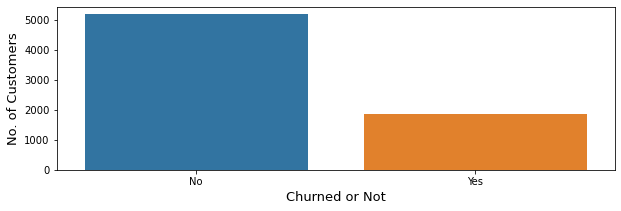

In [79]:
# Plot1: Churn Count Plot

plt.figure(figsize=(10,3))
sns.countplot(data["Churn"])
plt.xlabel("Churned or Not",fontsize=13)
plt.ylabel("No. of Customers",fontsize=13)
plt.show()

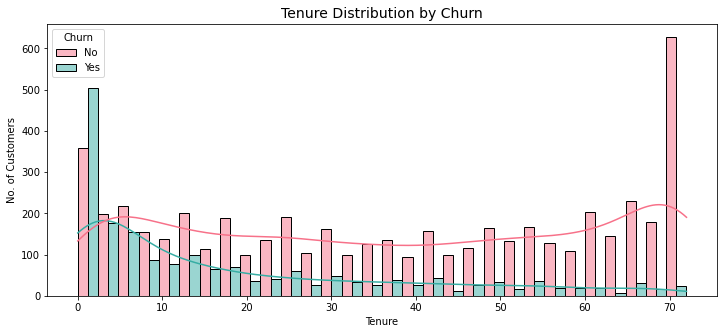

In [80]:
# Plot 2: Tenure Distribution by Churn

# Use the multiple="dodge" argument in sns.histplot() to separate bars for Churn categories:

plt.figure(figsize=(12, 5))
sns.histplot(data=data, x='tenure', hue="Churn",kde=True, multiple="dodge", palette='husl', bins=30)
plt.title('Tenure Distribution by Churn',fontsize=14)
plt.xlabel("Tenure")
plt.ylabel("No. of Customers")
plt.show()

In [81]:
data.groupby("tenure")["Churn"].value_counts()

tenure  Churn
0       No        11
1       Yes      380
        No       233
2       Yes      123
        No       115
                ... 
70      Yes       11
71      No       164
        Yes        6
72      No       356
        Yes        6
Name: Churn, Length: 145, dtype: int64

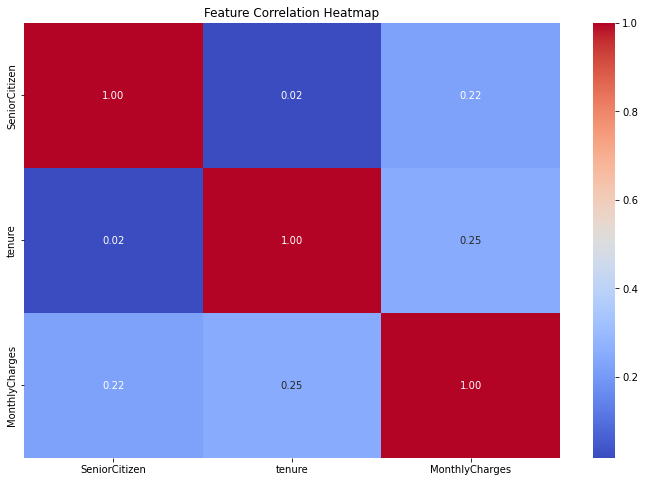

In [82]:
# PLot 4. Heatmap of Feature Correlation
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

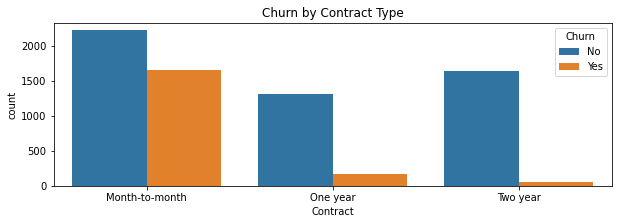

In [83]:
# Plot 5. Churn by Contract Type
plt.figure(figsize=(10, 3))
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn by Contract Type')
plt.show()

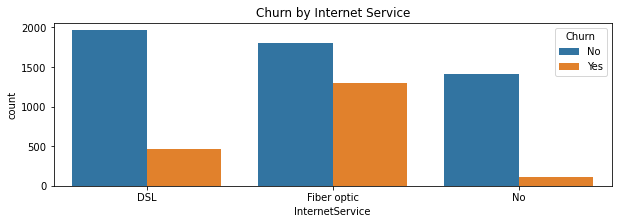

In [84]:
# 6. Churn Rate by Internet Service
plt.figure(figsize=(10,3))
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title('Churn by Internet Service')
plt.show()

# 

Step2: Handling Missing Values

In [85]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [86]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan).astype(float)
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

# 

 Step 3: Encode Categorical Variables - Label Encoding for binary features

In [87]:
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for features in binary_features:
    le=LabelEncoder()
    data[features] = le.fit_transform(data[features])

In [88]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [89]:
# One-Hot Encoding for multi-category features
multi_features = ['MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

data = pd.get_dummies(data,columns=multi_features,drop_first=True)

In [90]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,29.85,29.85,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,56.95,1889.50,0,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,53.85,108.15,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,42.30,1840.75,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,70.70,151.65,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,84.80,1990.50,0,...,0,1,0,1,1,0,1,0,0,1
7039,2234-XADUH,0,0,1,1,72,1,103.20,7362.90,0,...,0,1,0,1,1,0,1,1,0,0
7040,4801-JZAZL,0,0,1,1,11,0,29.60,346.45,0,...,0,0,0,0,0,0,1,0,1,0
7041,8361-LTMKD,1,1,1,0,4,1,74.40,306.60,1,...,0,0,0,0,0,0,1,0,0,1


# 

Step 4: Normalize/Scale Numerical Features

In [91]:
# Step 4: Normalize/Scale Numerical Features
scaler=StandardScaler()
numerical_features = ["tenure","MonthlyCharges","TotalCharges"]
data[numerical_features]=scaler.fit_transform(data[numerical_features])

In [92]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,-1.277445,0,-1.160323,-0.994971,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,1,0,0,0,0.066327,1,-0.259629,-0.173876,0,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,-1.236724,1,-0.362660,-0.960399,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,1,0,0,0,0.514251,0,-0.746535,-0.195400,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,0,0,0,0,-1.236724,1,0.197365,-0.941193,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,-0.340876,1,0.665992,-0.129281,0,...,0,1,0,1,1,0,1,0,0,1
7039,2234-XADUH,0,0,1,1,1.613701,1,1.277533,2.242808,0,...,0,1,0,1,1,0,1,1,0,0
7040,4801-JZAZL,0,0,1,1,-0.870241,0,-1.168632,-0.855182,0,...,0,0,0,0,0,0,1,0,1,0
7041,8361-LTMKD,1,1,1,0,-1.155283,1,0.320338,-0.872777,1,...,0,0,0,0,0,0,1,0,0,1


# 

Step 5: Handle Class Imbalance

In [93]:
# Step 5: Handle Class Imbalance
X = data.drop(columns=['customerID', 'Churn'])
y = data['Churn']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [94]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,-1.160323,-0.994971,1,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0.066327,1,-0.259629,-0.173876,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,-1.236724,1,-0.362660,-0.960399,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0.514251,0,-0.746535,-0.195400,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,-1.236724,1,0.197365,-0.941193,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,0.665992,-0.129281,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,0,0,1,1,1.613701,1,1.277533,2.242808,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,0,0,1,1,-0.870241,0,-1.168632,-0.855182,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,1,1,0,-1.155283,1,0.320338,-0.872777,0,1,...,0,0,0,0,0,0,1,0,0,1


In [95]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [96]:
X_resampled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,-1.160323,-0.994971,1,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0.066327,1,-0.259629,-0.173876,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,-1.236724,1,-0.362660,-0.960399,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0.514251,0,-0.746535,-0.195400,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,-1.236724,1,0.197365,-0.941193,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,0,0,0,-1.123195,1,0.479518,-0.844195,0,0,...,0,0,0,1,0,0,1,0,1,0
10344,1,0,0,0,-1.258492,0,-1.218362,-0.986433,1,0,...,0,0,0,0,0,0,1,0,0,1
10345,0,0,0,0,-1.253555,1,-0.631794,-0.975927,0,0,...,0,0,0,0,0,0,0,0,1,0
10346,0,0,0,0,-1.012098,1,-1.505760,-0.946713,0,0,...,1,0,1,0,0,0,0,0,1,0


In [97]:
y_resampled

0        0
1        0
2        1
3        0
4        1
        ..
10343    1
10344    1
10345    1
10346    1
10347    1
Name: Churn, Length: 10348, dtype: int32

# 

Step 6: Split Data

In [98]:
# Step 6: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [99]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4541,0,1,0,0,-1.277445,1,-0.472339,-0.985832,0,1,...,0,0,0,0,0,0,0,0,0,1
5709,0,0,0,0,-0.829521,1,-1.510962,-0.907151,0,0,...,1,0,1,0,1,0,0,0,0,1
7393,0,0,0,0,-0.805139,1,0.341280,-0.582177,0,1,...,0,0,0,0,0,0,0,0,0,1
10026,0,1,0,0,-1.207853,1,0.186911,-0.926205,0,0,...,0,0,0,0,0,0,1,0,1,0
3578,0,0,0,0,0.310650,1,0.011244,0.133652,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,0,1,1,1.613701,1,0.818877,1.807302,0,1,...,0,1,0,1,0,1,1,0,0,1
5191,0,0,1,1,-0.381597,1,0.875378,-0.037530,0,1,...,0,1,0,1,0,1,1,1,0,0
5390,1,1,0,0,-0.829521,1,1.152899,-0.478246,0,1,...,0,1,0,1,0,0,1,0,1,0
860,1,0,0,0,-0.259435,1,-1.494344,-0.806238,0,0,...,1,0,1,0,1,0,0,1,0,0


In [100]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_1,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
9428,0,1,0,0,0.570314,1,0.963576,0.927743,0,1,...,0,1,0,0,0,0,1,0,1,0
4593,0,0,0,0,-0.870241,1,-1.477726,-0.899402,0,0,...,1,0,1,0,0,0,0,0,0,0
5379,0,0,1,0,0.962175,1,1.104706,1.318990,0,1,...,0,1,0,1,1,0,1,0,1,0
8918,1,0,1,0,-0.981243,1,0.317965,-0.727068,0,0,...,0,0,0,0,0,0,0,0,1,0
6448,1,0,0,0,1.043616,1,1.325725,1.738004,0,1,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6425,1,0,1,1,0.799294,0,-0.681725,-0.003179,1,0,...,0,0,0,1,1,0,0,0,0,0
766,1,0,0,0,-0.422317,1,0.468238,-0.301589,0,1,...,0,0,0,0,0,0,1,0,0,1
1144,1,0,0,0,-1.277445,0,-0.970878,-0.992455,1,0,...,0,0,0,1,0,0,1,0,1,0
3065,1,0,0,0,-1.277445,1,-0.630210,-0.987929,0,0,...,0,0,0,0,0,0,1,0,0,1


In [101]:
y_train

4541     1
5709     0
7393     1
10026    1
3578     0
        ..
5734     0
5191     0
5390     1
860      0
7270     1
Name: Churn, Length: 8278, dtype: int32

In [102]:
y_test

9428    1
4593    0
5379    0
8918    1
6448    1
       ..
6425    0
766     0
1144    1
3065    0
7073    1
Name: Churn, Length: 2070, dtype: int32

# 

Step 7: Train Machine Learning Model

In [103]:
# Step 7: Train Machine Learning Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [104]:
rf_model

RandomForestClassifier(random_state=42)

# 

Step 8: Evaluate the Model

**Model Performance**

Classification Report:
Precision, recall, and F1-scores show the model's accuracy for both churn and non-churn classes.

ROC-AUC Score:
The ROC-AUC score quantifies the model's ability to discriminate between classes.

Confusion Matrix:
Visualizes the performance of the model in terms of correct and incorrect predictions.


In [105]:
# Step 8: Evaluate the Model
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1021
           1       0.84      0.88      0.86      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070

ROC-AUC Score: 0.9272718105672209
Confusion Matrix:
 [[843 178]
 [129 920]]


# 

**Feature Importance**

The Top 10 Features influencing churn prediction are visualized.

Features like Contract_Month-to-month, tenure, and MonthlyCharges were found to have the most significant impact on churn.

In [106]:
# Top Feature Importance from Random Forest
plt.figure(figsize=(10, 6))
importances = rf_model.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig=go.Figure()
fig.add_trace(go.Bar(x=feat_importances[:10].index,y=feat_importances[:10].values,
                    marker_color=colors_palette[0]))
fig.show()
plt.show()

<Figure size 720x432 with 0 Axes>

# 

# Conclusion

This project successfully combined data analysis and machine learning to:

 1. Understand customer behavior and churn trends.

 2. Identify actionable insights (e.g., customers on Month-to-Month contracts are at higher risk).

 3. Develop a predictive model to help businesses retain customers by identifying high-risk churn groups.


**The combination of EDA (Exploratory Data Analysis) and machine learning demonstrates a practical data analytics pipeline, making it a well-rounded data analytics project.**